In [62]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\conno_leva1li\Downloads\data_jobs.csv')

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill )

In [63]:
df_data = df[df['job_title_short'].str.contains('Data')]
df_data = df_data.dropna(subset='salary_year_avg')

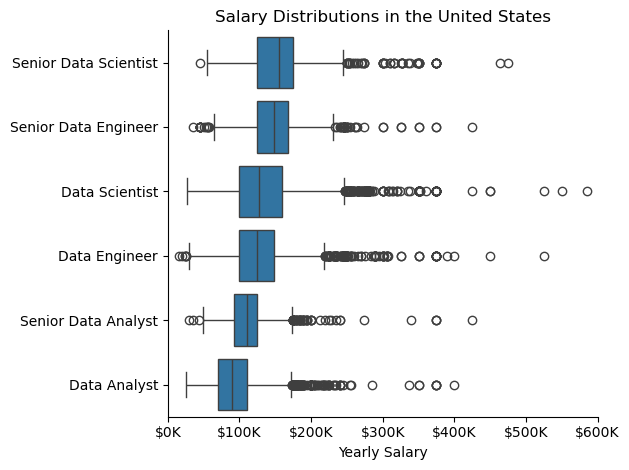

In [64]:



df_data_sorted = df_data.groupby('job_title_short')['salary_year_avg'].median().reset_index(name='salary_avg').sort_values(by='salary_avg', ascending=False)
#df_data.groupby('job_title_short')['salary_year_avg'].plot(kind='box', vert=False)
job_titles = df_data_sorted['job_title_short'].unique().tolist()

sns.boxplot(data=df_data, x='salary_year_avg', y='job_title_short', order=job_titles )
sns.despine()
plt.ylabel('')
plt.xlabel('Yearly Salary')

plt.title('Salary Distributions in the United States')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${x/1000:.0f}K'))

plt.xlim(0,600000)

#for i, value in enumerate(df_data_sorted['salary_avg']):
    #ax.text(value, i, f"${value:,.0f}", va='center', ha='left', fontsize=8, color='red')

plt.tight_layout()
plt.show()


In [65]:
df_DA_US = df[(df['job_title_short']== 'Data Analyst')&(df['job_country'] == 'United States')].copy()
df_DA_US = df_DA_US.dropna(subset='salary_year_avg')
df_DA_US = df_DA_US.explode('job_skills')
df_DA_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,python,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,r,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,alteryx,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,tableau,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,excel,"{'analyst_tools': ['excel', 'powerpoint']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,sql,"{'analyst_tools': ['tableau', 'excel', 'altery..."
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,vba,"{'analyst_tools': ['tableau', 'excel', 'altery..."
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,tableau,"{'analyst_tools': ['tableau', 'excel', 'altery..."
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,excel,"{'analyst_tools': ['tableau', 'excel', 'altery..."


In [77]:
df_DA_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
df_DA_group

,count,median
job_skills,,
airflow,44,116250.00
airtable,5,90000.00
alteryx,106,106281.25
angular,8,107500.00
ansible,1,159640.00
...,...,...
wire,4,74250.00
word,461,81194.75
workfront,3,75000.00


In [66]:
df_DA_US_sal = df_DA_US.groupby('job_skills')['salary_year_avg'].median().reset_index(name='salary')


In [80]:
df_high_pay = df_DA_group.sort_values(by='median', ascending=False).head(10)
df_high_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [91]:
df_job_count = df_DA_group.sort_values(by='count', ascending=False).head(10)
df_job_count = df_job_count.sort_values(by='median', ascending=False)

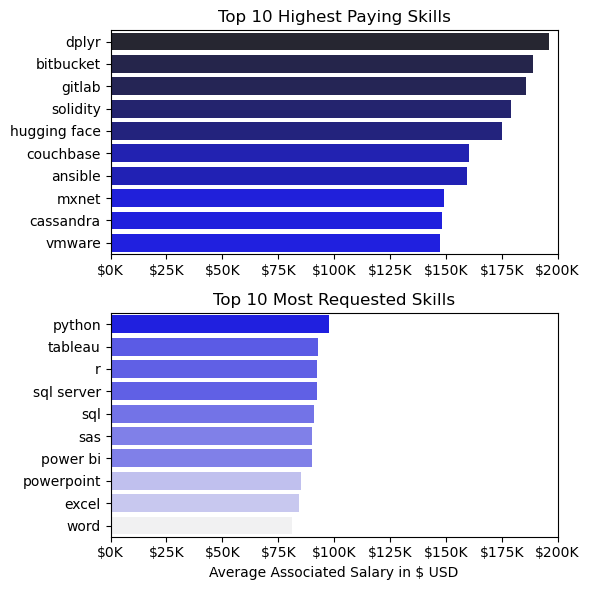

In [95]:
fig, ax = plt.subplots(2,1, figsize=(6,6))

sns.barplot(data=df_high_pay, x='median', y=df_high_pay.index, ax=ax[0], hue='median', palette='dark:b_r')
sns.barplot(data = df_job_count,x='median', y=df_job_count.index, ax=ax[1], hue='median', palette='light:b')

ax[0].set_title('Top 10 Highest Paying Skills', fontsize=12)
ax[1].set_title('Top 10 Most Requested Skills', fontsize=12)
ax[1].set_xlabel('Average Associated Salary in $ USD')
ax[0].set_xlabel('')

for a in ax:
    a.set_xlim(0,200000)
    a.set_ylabel('')
    a.legend().remove()
    a.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${x/1000:.0f}K'))
fig.tight_layout()